In [ ]:
"""Nicholas Novak ENPM673 Project 1 Solution Notebook"""

In [1]:
def findBallCoords(frame):
    blurred_mask = cv2.GaussianBlur(frame,(9,9),3,3)

    hsv_mask = cv2.cvtColor(blurred_mask, cv2.COLOR_BGR2HSV)

    bright_red_lower_bounds = (0, 100, 100)
    bright_red_upper_bounds = (10, 255, 255)
    bright_red_mask = cv2.inRange(hsv_mask, bright_red_lower_bounds, bright_red_upper_bounds)

    dark_red_lower_bounds = (160, 100, 100)
    dark_red_upper_bounds = (179, 255, 255)
    dark_red_mask = cv2.inRange(hsv_mask, dark_red_lower_bounds, dark_red_upper_bounds)


    weighted_mask = cv2.addWeighted(bright_red_mask, 1.0, dark_red_mask, 1.0, 0.0)

    
    # blurred_mask2 = cv2.GaussianBlur(weighted_mask, (9,9),3,3)
   
    img = np.copy(frame)
    # weighted_mask[0:80,:] = [0,0,0]

    resulting_frame = cv2.bitwise_and(img, img, mask = weighted_mask)
    resulting_frame[:,0:110] = [0,0,0]


    fx,fy,chn = resulting_frame.shape

    resulting_frame = cv2.resize(resulting_frame, (int(fx/5), int(fy/5)))

    fx,fy,chn = resulting_frame.shape

    num_pix = 0
    a = np.empty((0,2),int)
    b = np.copy(a)
    for col in range(fx):
        for row in range(fy):
            if resulting_frame[col,row,0] != 0:
                num_pix += 1
                if num_pix == 1:
                    col = fx - col
                    a = np.append(a,np.array([[col,row]]), axis=0)
                    # print(a)

    num_pix_rev = 0
    for col in reversed(range(fx)):
        for row in reversed(range(fy)):
            if resulting_frame[col,row,0]!=0:
                num_pix_rev += 1
                if num_pix_rev == 1:
                    col=fx-col
                    b=np.append(b,np.array([[col,row]]),axis=0)

    # print(a,b)
    col+=1
    cv2.waitKey(1)
    
    return a,b

In [2]:
def standardLeastSquares(vert_stack):
    x_axis = vert_stack[:,0]
    y_axis = vert_stack[:,1]

    x_square = np.power(x_axis, 2)

    A = np.stack((x_square, x_axis, np.ones((len(x_axis)), dtype=int)), axis=1)

    A_trans = A.transpose()
    A_dot_A = A_trans.dot(A)
    A_dot_Y = A_trans.dot(y_axis)

    least_sqr_estimate = (np.linalg.inv(A_dot_A)).dot(A_dot_Y)
    B = least_sqr_estimate

    least_sqr_val = A.dot(least_sqr_estimate)

    return least_sqr_val

[ WARN:0@108.221] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@108.221] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin1 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@108.222] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@108.222] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_

Equation of parabola: 
 y= -0.03239709807147432 x^2 +  3.0272793427363527 x +  41.313675250687325


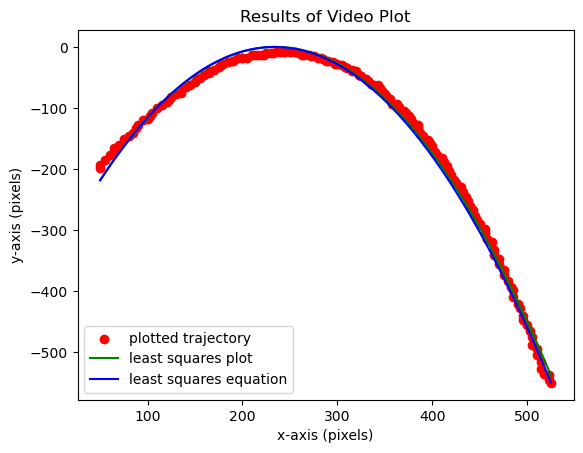

x-value at y =  1137.5  pixels (ground): 
650.6381621919668


In [5]:
import cv2
import matplotlib
import numpy as np
import math
import matplotlib
from sympy import N
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# Problem 1:

# def processAndPlotVideo(video_name):
video_source = cv2.VideoCapture('ball.mov')

if (video_source.isOpened() == False):
    print("Error openeing video")

min_BGR1 = np.array([0,20,90])
max_BGR1 = np.array([73,83,150])

# min_BGR2 = np.array([0,176,102])
# max_BGR2 = np.array([255,255,255])
# min_HSV = np.array([0,23,111])
# max_HSV = np.array([9,219,177])

min_HSV1 = np.array([0,120,70])
max_HSV1 = np.array([10,255,255])

min_HSV2 = np.array([170,120,70])
max_HSV2 = np.array([180,255,255])
# if video_source.isOpened():
#     ret,frame = video_source.read()
#     if ret: 
#         blank_mask = np.copy(frame)
#         for col in blank_mask:
#             for pix in col:
#                 for val in range(len(pix)):
#                     pix[val] = 0

reading, frame = video_source.read()
x_vals = []
y_vals = []
while reading:
    
    a,b = findBallCoords(frame=frame)
    for col in range(len(a)):
        x_vals = np.append(x_vals, ((a[col][1] + b[col][1]) / 2))

    for row in range(len(a)):
        y_vals = np.append(y_vals, ((a[row][0] + b[row][0]) / 2))
    reading, frame = video_source.read()
# print("vals" + str(x_vals) + str(y_vals))


video_source.release()

cv2.destroyAllWindows()
stacked_vals = np.vstack((x_vals,y_vals)).T
# print(stacked_vals)
y_vals_ls = standardLeastSquares(stacked_vals)
# print ("Next")
# print(x_vals, y_vals)

y_max = 0
x_max = 0
for i in range(len(y_vals_ls)):
    if y_vals_ls[i] > y_max:
        y_max = y_vals_ls[i]
        x_max = x_vals[i]
fig = plt.figure()
plt.title('Nicholas Novak Project 1 Question 1')
plt.subplot(111)
plt.xlabel('x-axis (pixels)')
plt.ylabel('y-axis (pixels)')
plt.scatter(x_vals*5, y_vals*5 - y_max * 5, c='red', label='plotted trajectory')
plt.plot(x_vals*5, y_vals_ls*5 - y_max * 5, c='green', label='least squares plot')
plt.title("Results of Video Plot")
# print("Equation: ", eq)

def calc_parabola_equation(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3);
    A = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom;
    B = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom;
    C = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom;

    return A,B,C

a,b,c = calc_parabola_equation(x_vals[0], y_vals_ls[0], x_max, y_max, x_vals[-1],y_vals[-1])

print("Equation of parabola: \n y=",a,"x^2 + ",b,"x + ",c)
y_pos = []
for i in range(len(x_vals)):
    x_v = x_vals[i]
    y_pos.append(((a*x_v**2)+(b*x_v)+c)*5 - y_max * 5)
plt.plot(x_vals*5, y_pos, c='blue', label='least squares equation')
plt.legend()
# plt.gca().invert_yaxis()
plt.show()

y_fin = y_vals[0] - 300

print("x-value at y = ",abs(y_fin*5)," pixels (ground): ")
x_fin = math.sqrt((y_fin/a) - y_max) + x_max
print(x_fin * 5)

Covariance Matrix:
 [[ 33.7500586   -0.82513692 -11.39434956]
 [ -0.82513692  35.19218154 -23.23572298]
 [-11.39434956 -23.23572298  20.62765365]]
EigVals and Vects of pc1.csv: 
 [ 0.66950978 34.65757844 54.24280557] 

 [[ 0.28616428  0.90682723 -0.30947435]
 [ 0.53971234 -0.41941949 -0.72993005]
 [ 0.79172003 -0.04185278  0.60944872]]
Normal direction (x,y,z):  [ 0.28616428  0.90682723 -0.30947435] 
Normal magnitude:  0.6695097797767815
UTU is shape:  (3, 3)
EigVals  [ 9.59747275e+05  1.41232505e-12 -2.53128445e-12]
eigvects  [[ 0.02137983  0.81175476  0.07391371]
 [-0.04332063 -0.58243997  0.99639524]
 [ 0.99883243 -0.04263662  0.04163281]]
Min:  2


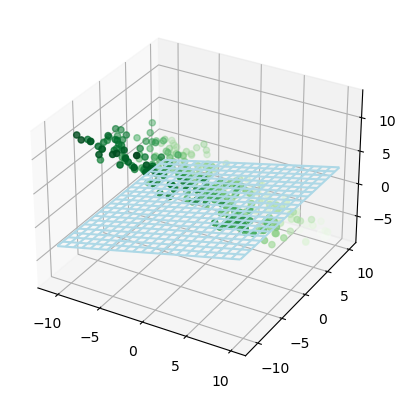

UTU is shape:  (3, 3)
EigVals  [ 1.34478789e+06  1.86749034e-11 -6.57720706e-12]
eigvects  [[ 0.11407736  0.46853165  0.42317168]
 [-0.0448125  -0.87848274  0.90601653]
 [ 0.99246068 -0.09352094 -0.00773174]]
Min:  2


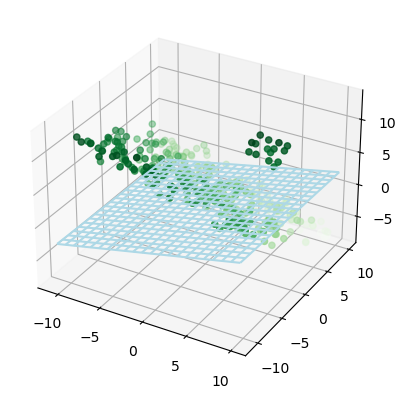

In [9]:
# Problem 2:

import csv
from numpy import linalg as la

def findVariance(mean_val, series_vals):
    S = 0

    sub_series = [i - mean_val for i in series_vals]
    sub_series_T = [(i - mean_val).T for i in series_vals]

    num = sum([sub_series[i] * sub_series_T[i] for i in range(len(sub_series))])
    den = len(series_vals) - 1
    cov = num/den
    return cov

def findCOV(series_data_1, series_data_2):
    mean_1 = series_data_1[0]
    series_1 = series_data_1[1]

    mean_2 = series_data_2[0]
    series_2 = series_data_2[1]

    sub_series_1 = [i - mean_1 for i in series_1]
    sub_series_2 = [i - mean_2 for i in series_2]
    num = sum([sub_series_1[i] * sub_series_2[i] for i in range(len(sub_series_1))])
    den = len(series_1) - 1
    COV = num/den
    return COV

    
with open('pc1.csv', 'r') as lidar_source:
    csv_reader = csv.reader(lidar_source)

    list_of_csv = list(csv_reader)
    x_vals = [float(list_of_csv[i][0]) for i in range(len(list_of_csv))]
    y_vals = [float(list_of_csv[i][1]) for i in range(len(list_of_csv))]
    z_vals = [float(list_of_csv[i][2]) for i in range(len(list_of_csv))]


    x_mean = np.mean(x_vals)
    y_mean = np.mean(y_vals)
    z_mean = np.mean(z_vals)

    list_of_means = [(x_mean, x_vals), (y_mean, y_vals), (z_mean, z_vals)]
    for i in list_of_means:
       variance = findVariance(i[0], i[1])
    #    COV1 = findCOV()

    COV = np.array([[findVariance(x_mean, x_vals), findCOV(list_of_means[1],list_of_means[0]), findCOV(list_of_means[2], list_of_means[0])], \
        [findCOV(list_of_means[0], list_of_means[1]), findVariance(y_mean, y_vals), findCOV(list_of_means[2], list_of_means[1])], \
            [findCOV(list_of_means[0], list_of_means[2]), findCOV(list_of_means[1], list_of_means[2]), findVariance(z_mean, z_vals)]])

    # print("BEEEG ", COV)
    
    #COV = [Sx COV(yx) COV (zx)
    #    COV(xy)  Sy    COV(zy)
    #    COV(xz)  COV(yz)  Sz]
    # data = np.cov(np.array([x_vals, y_vals, z_vals]), bias = False)
    # print("Data: ", data)
    data = COV



    eigVals, eigVects = la.eig(data)
    print("Covariance Matrix:\n",data)
    print("EigVals and Vects of pc1.csv: \n", eigVals, "\n\n", eigVects)

    val_min = eigVals[0]
    min_count = 0
    for i in range(len(eigVals)):
        if eigVals[i] < val_min:
            val_min = eigVals[i]
            min_count = i
    eigVect_min = eigVects[min_count]
    eigVal_min = eigVals[min_count] 

    print("Normal direction (x,y,z): ", eigVect_min, "\nNormal magnitude: ", eigVal_min)

#--------- Problem 2 part 2.a total least squares is below ---------#

with open('pc1.csv', 'r') as lidar_source:
    csv_reader = csv.reader(lidar_source)

    list_of_csv = list(csv_reader)
    x_vals = [float(list_of_csv[i][0]) for i in range(len(list_of_csv))]
    y_vals = [float(list_of_csv[i][1]) for i in range(len(list_of_csv))]
    z_vals = [float(list_of_csv[i][2]) for i in range(len(list_of_csv))]
# x_vals += x_vals2
# y_vals += y_vals2
# z_vals += z_vals2

# Finding TLS:
x_mean = np.mean(x_vals)
y_mean = np.mean(y_vals)
z_mean = np.mean(z_vals)

n = len(x_vals)

U = np.array([[np.sum(x_vals)-x_mean],[np.sum(y_vals)-y_mean],[np.sum(z_vals)-z_mean]]).T

UTU = np.dot(U.transpose(),U)
print("UTU is shape: ", UTU.shape)
eigVals, eigVects = la.eig(UTU)
print("EigVals ", eigVals)
print("eigvects ", eigVects)
minVal = np.argmin(eigVals)
print("Min: ",minVal)
minVect = eigVects[minVal]

ax = plt.axes(projection='3d')
ax.scatter3D(x_vals, y_vals, z_vals, c = z_vals, cmap = 'Greens')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = ((minVect[0] * X[r,c] + minVect[1] * Y[r,c] + minVect[2])-minVect[0] * x_mean-minVect[1] * y_mean)/z_mean
ax.plot_wireframe(X,Y,Z, color='lightblue')
plt.show()

with open('pc2.csv', 'r') as lidar_source:
    csv_reader = csv.reader(lidar_source)

    list_of_csv = list(csv_reader)
    x_vals = [float(list_of_csv[i][0]) for i in range(len(list_of_csv))]
    y_vals = [float(list_of_csv[i][1]) for i in range(len(list_of_csv))]
    z_vals = [float(list_of_csv[i][2]) for i in range(len(list_of_csv))]
# x_vals += x_vals2
# y_vals += y_vals2
# z_vals += z_vals2

# Finding TLS:
x_mean = np.mean(x_vals)
y_mean = np.mean(y_vals)
z_mean = np.mean(z_vals)

n = len(x_vals)

U = np.vstack(((np.sum(x_vals)-x_mean),(np.sum(y_vals)-y_mean),(np.sum(z_vals)-z_mean))).T

UTU = np.dot(U.transpose(),U)
print("UTU is shape: ", UTU.shape)
eigVals, eigVects = la.eig(UTU)
print("EigVals ", eigVals)
print("eigvects ", eigVects)
minVal = np.argmin(eigVals)
print("Min: ",minVal)
minVect = eigVects[minVal]

ax = plt.axes(projection='3d')
ax.scatter3D(x_vals, y_vals, z_vals, c = z_vals, cmap = 'Greens')


xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = ((minVect[0] * X[r,c] + minVect[1] * Y[r,c] + minVect[2])-minVect[0] * x_mean-minVect[1] * y_mean)/z_mean
ax.plot_wireframe(X,Y,Z, color='lightblue')
plt.show()
# a,b,c = minVect
# D = a*x_mean + b*y_mean + c
# tls_vals = []
# for i in range(len(x_vals)):
#     z_temp = (D-(a*x_vals[i])-b*y_vals[i])/c
#     tls_vals.append(z_temp)
# tls_vals = np.array(tls_vals)
# x = np.linspace(-10, 10, 300)
# y = np.linspace(-10, 10, 300)

# X, Y = np.meshgrid(x, y)

# origin = np.array([x_mean,y_mean,z_mean])
# print("x",len(X),"\n","y",len(Y),"\n","z",len(tls_vals))
# ax.plot_wireframe(X,Y,tls_vals,c='blue')
# plt.show()
# normal = np.cross(np.array(vecA), np.array(vecB))
        
# # print(normal / la.norm(normal))

# a,b,c = normal / la.norm(normal)
# d = np.sum(normal @ p1[0:3])

# x, y, z = np.meshgrid (x_vals, y_vals, z_vals)


# ax.contour3D( x, y, z, 50 ,cmap='binary')


Soln
-0.353955 x + -0.668551 y + 3.202554 = z
errors:
residual:


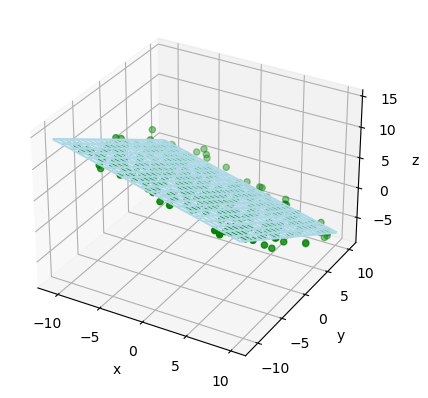

Soln
-0.251884 x + -0.671737 y + 3.660257 = z
errors:
residual:


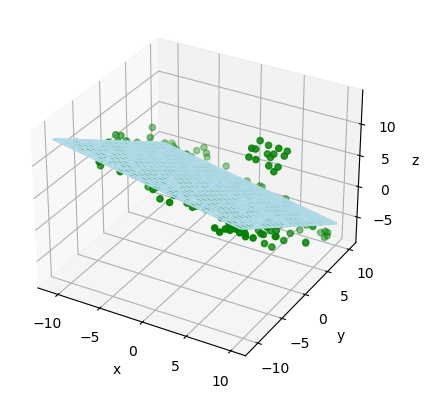

In [41]:
import random
import cv2
import matplotlib
import numpy as np
import math
import matplotlib
from sympy import N
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
from numpy import linalg as la
# Problem 2, Part 2, standard least squares:
def getPlaneHyperParams(name):
    tmpA = []
    tmpB = []
    with open(name, 'r') as lidar_source:
        csv_reader = csv.reader(lidar_source)

        list_of_csv = list(csv_reader)
        x = [float(list_of_csv[i][0]) for i in range(len(list_of_csv))]
        y = [float(list_of_csv[i][1]) for i in range(len(list_of_csv))]
        z = [float(list_of_csv[i][2]) for i in range(len(list_of_csv))]
    for i in range(len(x)):
        tmpA.append([x[i],y[i],1])
        tmpB.append(z[i])
    
    b = np.matrix(tmpB).T
    A = np.matrix(tmpA)
    fit = (A.T * A).I * A.T * b
    errors = b-A * fit
    residual = la.norm(errors)

    print("Soln")
    print("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
    print("errors:")
    # print(errors)
    print("residual:")
    # print(residual)

    plt.figure()
    ax = plt.subplot(111, projection='3d')
    ax.scatter(x,y,z,color='green')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
    Z = np.zeros(X.shape)
    for r in range(X.shape[0]):
        for c in range(X.shape[1]):
            Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
    ax.plot_wireframe(X,Y,Z, color='lightblue')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
getPlaneHyperParams('pc1.csv')
getPlaneHyperParams('pc2.csv')


size 300
Itercount =  10.962830879060357
256
297
9
14
20
22
Inlier sub:  1.0101010101010102
(297,)


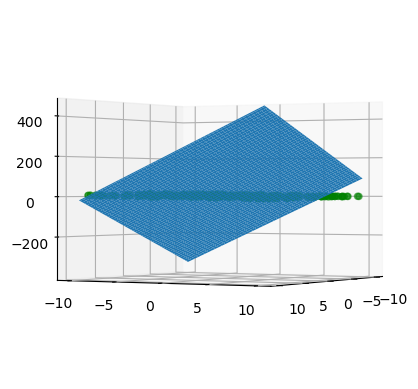

(297,)


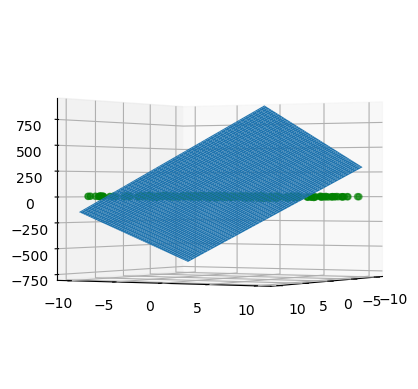

In [221]:
"""
Nicholas Novak
RANSAC SECTION Problem 2:
"""
import random
import cv2
import matplotlib
import numpy as np
import math
import matplotlib
from sympy import N
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
from numpy import linalg as la


with open('pc1.csv', 'r') as lidar_source:
    csv_reader = csv.reader(lidar_source)

    list_of_csv = list(csv_reader)
    x = [float(list_of_csv[i][0]) for i in range(len(list_of_csv))]
    y = [float(list_of_csv[i][1]) for i in range(len(list_of_csv))]
    z = [float(list_of_csv[i][2]) for i in range(len(list_of_csv))]
with open('pc2.csv', 'r') as lidar_source:
    csv_reader = csv.reader(lidar_source)

    list_of_csv2 = list(csv_reader)
    x2 = [float(list_of_csv[i][0]) for i in range(len(list_of_csv))]
    y2 = [float(list_of_csv[i][1]) for i in range(len(list_of_csv))]
    z2 = [float(list_of_csv[i][2]) for i in range(len(list_of_csv))]
    # xyz = np.vstack(x,y,z)
def calcRansac(xyz,x,y,z, thresh = 5, iterations = 1000):
    
    inliers = []
    equation=[]
    n_points = len(xyz)
    i = 1

    while i < iterations:
        idx_samples = random.sample(range(n_points), 3)
        pts = [xyz[i] for i in idx_samples]
        p0 = np.array(pts[0]).astype('float64')
        p1 = np.array(pts[1]).astype('float64')
        p2 = np.array(pts[2]).astype('float64')
        
        V1 = p1-p0
        V2 = p2-p0

        # for i in p1:
        #     print(i)
        # vecA = [float(x)-float(y) for x,y in zip(p1[0:3],p0[0:3])]
        # vecB = [float(x)-float(y) for x,y in zip(p2[0:3],p0[0:3])]
        # print(type(np.array(vecA)))
        # print(np.shape(vecA),np.shape(vecB))
        normal = np.cross(np.array(V1), np.array(V2))
        
        # print(normal / la.norm(normal))
    
        a,b,c = normal
        d = np.dot(normal, p0)
        # print(a.dtype,xyz[0][0].dtype)
        idx_candidates = []
        # for i in range(len(xyz)):
        # print('xyz',x[:][0])
        # distance = (a * float(x[:][0]) + b * float(y[:][0]) + c * float(z[:][0]) + d) / np.sqrt(a**2 + b**2 + c**2)
        distance = [(a * x1 + b * y1 + c * z1 - d) / np.sqrt(a**2 + b**2 + c**2) for x1,y1,z1 in zip(x,y,z) if x1 not in [p0[0],p1[0],p2[0]] and y1 not in [p0[1],p1[1],p2[1]] and z1 not in [p0[2],p1[2],p2[2]]]

        # print(distance)
        idx_candidates = np.where(np.abs(distance) <= thresh)[0]
        # print(idx_candidates)

        if len(idx_candidates) > len(inliers)+1:
            equation = [a,b,c,d]
            inliers = idx_candidates
            print(len(idx_candidates))
        
        i+=1
    return equation, inliers
print("size", len(list_of_csv))

p = 0.99
e = .3
s = 3
iter_count = math.log(1-p)/math.log(1-((1-e)**s))
print("Itercount = ",iter_count)
iter_count = 900

eq, inliers = calcRansac(list_of_csv,x,y,z,10.85,iter_count)
eq2, inliers2 = calcRansac(list_of_csv2,x2,y2,z2,0.05,iter_count)

print("Inlier sub: ", len(x)/len(inliers))
real_inliers = [list_of_csv[i] for i in inliers]
real_inliers2 = [list_of_csv2[i] for i in inliers2]


xp = np.linspace(-10, 10, 100)
yp = np.linspace(-10, 10, 100)

xpl, ypl = np.meshgrid(xp, yp)
eq_plot = eq[0] * xpl + eq[1] * ypl + eq[2]

ax = plt.axes(projection='3d')

ax.plot_surface(xpl,ypl,eq_plot)
ax.scatter3D(x, y, z, c = 'green')
print(np.shape(inliers))
ax.view_init(0,30)
plt.show()

xp = np.linspace(-10, 10, 100)
yp = np.linspace(-10, 10, 100)

xpl, ypl = np.meshgrid(xp, yp)
eq_plot = eq2[0] * xpl + eq2[1] * ypl + eq2[2]

ax = plt.axes(projection='3d')

ax.plot_surface(xpl,ypl,eq_plot)
ax.scatter3D(x, y, z, c = 'green')
print(np.shape(inliers))
ax.view_init(0,30)
plt.show()
